<img src="https://github.com/FarzadNekouee/Keras-CIFAR10-CNN-Model/blob/master/image.png?raw=true" width="1800">

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

<h2 align="left"><font color=#8502d1>CIFAR-10 Dataset</font></h2>

The __CIFAR-10__ dataset is a well-established benchmark in the field of machine learning, specifically designed for __image classification__. Comprising __60,000 color images__, each of __size 32x32 pixels__, the dataset is segmented into __10 distinct classes__, each representing a different object or creature. The classes encompass the following:

- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

Each class contains an equal distribution, boasting 6,000 images. From the total image count, 50,000 are designated for training while the remaining 10,000 are set aside for testing.

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

<h2 align="left"><font color=#8502d1>Objectives</font></h2>
    
* __Data Insights and Exploration__
   - Familiarize with the CIFAR-10 dataset.
   - Visually inspect sample images from various classes to understand data distribution.

    
* __Comprehensive Data Preprocessing__
   - Normalize pixel values of the images to enhance model training efficiency.
   - Convert image labels into a one-hot encoded format suitable for classification tasks.
   - Implement data augmentation techniques to increase the dataset's variability and improve model generalization.

    
* __Architectural Design using Keras__
   - Design a Convolutional Neural Network (CNN) tailored for the CIFAR-10 dataset using the __Keras__ framework.
   - Incorporate mechanisms such as dropouts and regularizations to counteract overfitting.

    
* __Model Training Process__
   - Train the CNN using the prepared dataset.
   - Utilize callbacks to adjust the learning rate dynamically and halt the training early if no improvements are detected, restoring the best model weights from the training.

    
* __Learning Analysis__
   - Visualize the model's learning curves, observing both training and validation performance metrics over epochs.

    
* __Model Evaluation__
   - Assess the trained model's accuracy and loss on the unseen test data to determine its robustness.

    
* __Real-world Generalization Check__
   - Evaluate the model's predictive capability using an image not part of the CIFAR-10 dataset to gauge its real-world applicability.


<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #e2c9ff; font-size:125%; text-align:left">

<h2 align="left"><font color=#8502d1>Table of Contents</font></h2>
    
* [Step 1 | Import Necessary Libraries](#import)
* [Step 2 | Data Preparation and Exploration](#exploration)
* [Step 3 | Data Preprocessing](#preprocessing)
    - [Step 3.1 | Normalization of Image Data](#normalization)
    - [Step 3.2 | One-Hot Encoding of Labels](#onehot)
    - [Step 3.3 | Data Augmentation](#augmentation)
* [Step 4 | Define CNN Model Architecture](#cnn)
* [Step 5 | Training the CNN Model](#train)
* [Step 6 | Visualizing the Learning Curves](#curves)
* [Step 7 | Evaluating the Optimal Model on Test Data](#evaluation)
* [Step 8 | Performance on an Out-of-Dataset Image](#image)

<a id="import"></a>
# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Necessary Libraries</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">

First, we're importing all the necessary libraries to kick off our project. We'll be relying on __TensorFlow__ and __Keras__ to handle the image data, craft our model, and optimize it for best performance:

In [3]:
import warnings
warnings.filterwarnings('ignore')

import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import load_model

<a id="exploration"></a>
# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Data Preparation and Exploration</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">

First, let's download the __CIFAR-10__ dataset from Keras library:

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">

Then, let's split original training data to training and validation sets:

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">
    
Now, we're printing out the dimensions of our training, validation, and test datasets:

In [9]:
print('Train Images Shape:      ', X_train.shape)
print('Train Labels Shape:      ', y_train.shape)

print('\nValidation Images Shape: ', X_valid.shape)
print('Validation Labels Shape: ', y_valid.shape)

print('\nTest Images Shape:       ', X_test.shape)
print('Test Labels Shape:       ', y_test.shape)

Train Images Shape:       (45000, 32, 32, 3)
Train Labels Shape:       (45000, 1)

Validation Images Shape:  (5000, 32, 32, 3)
Validation Labels Shape:  (5000, 1)

Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 1)


<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">

Afterward, let's take an overview of the __CIFAR-10__ dataset:

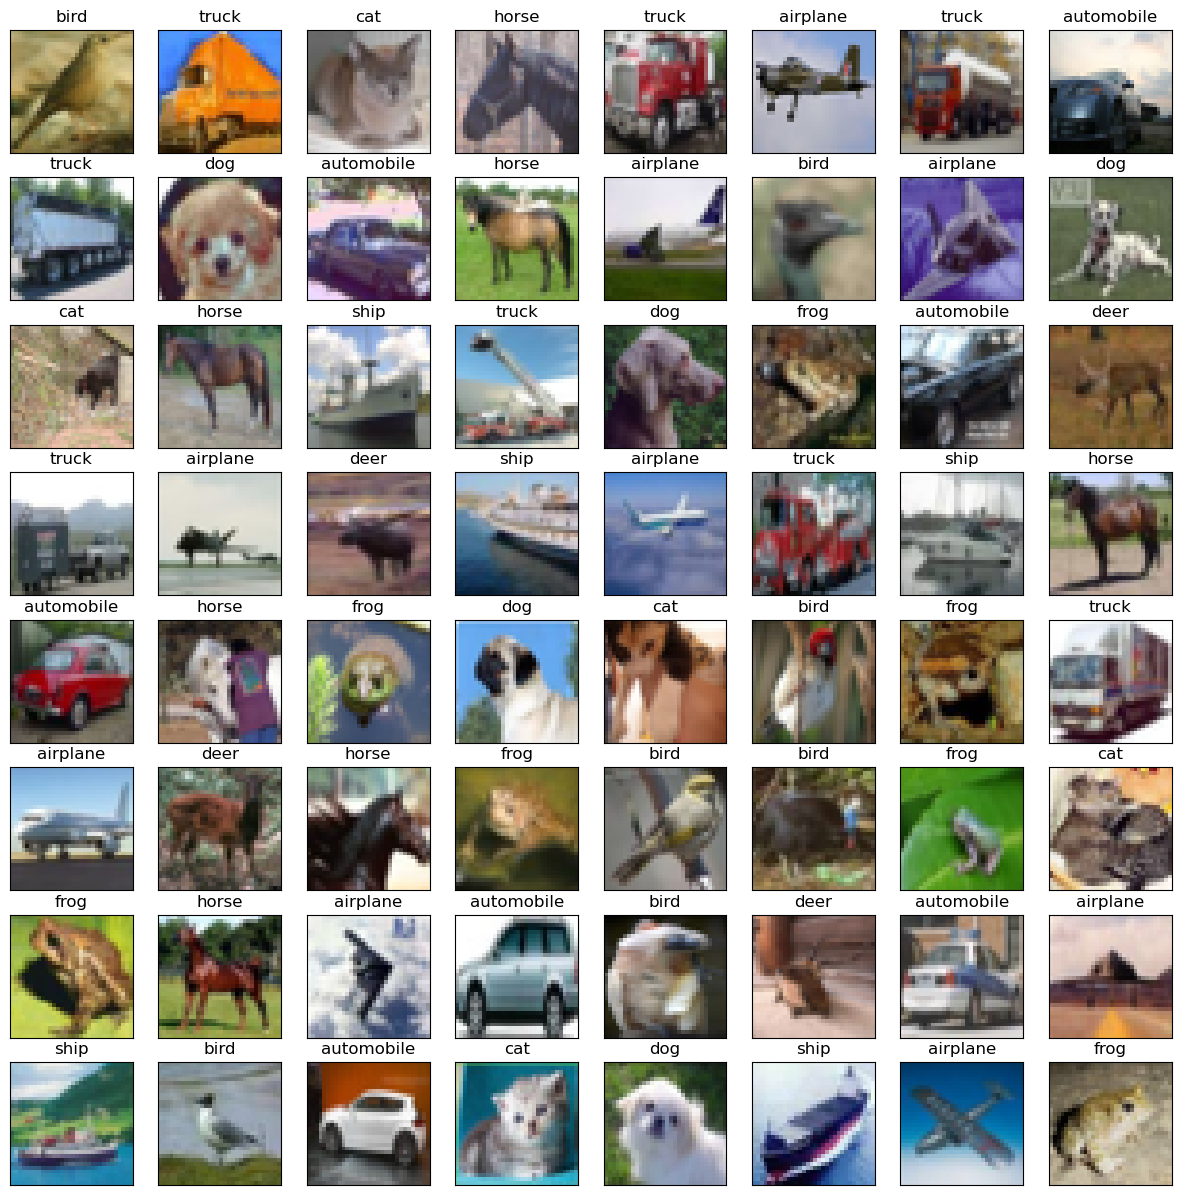

In [11]:
# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
               
# Create a new figure
plt.figure(figsize=(15,15))

# Loop over the first 25 images
for i in range(64):
    # Create a subplot for each image
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(X_train[i])

    # Set the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=12)

# Display the figure
plt.show()

<a id="preprocessing"></a>
# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Data Preprocessing</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">

In the **Data Preprocessing** phase, we undertake essential preparatory measures to ensure our dataset is aptly primed for the modeling process:

1. **Normalization of Image Data**

2. **One-Hot Encoding of Labels**

3. **Data Augmentation**

<a id="normalization"></a>

# <b><span style='color:darkorange'>Step 3.1 |</span><span style='color: #8502d1'> Normalization of Image Data</span></b>

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">
    
First of all, I am going to convert the pixel values data type to __float32__ type, and then normalizes them by subtracting the mean and dividing by the standard deviation of the training set, enhancing the model's training efficiency and effectiveness:

In [13]:
# Convert pixel values data type to float32
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_valid = X_valid.astype('float32')

# Calculate the mean and standard deviation of the training images
mean = np.mean(X_train)
std  = np.std(X_train)

# Normalize the data
# The tiny value 1e-7 is added to prevent division by zero
X_train = (X_train-mean)/(std+1e-7)
X_test  = (X_test-mean) /(std+1e-7)
X_valid = (X_valid-mean)/(std+1e-7)

<a id="onehot"></a>

# <b><span style='color:darkorange'>Step 3.2 |</span><span style='color: #8502d1'> One-Hot Encoding of Labels</span></b>

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">

Then, I am going to convert the class labels to one-hot vectors to transform the categorical labels into a format suitable for multi-class classification by neural networks:

In [15]:
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test  = to_categorical(y_test, 10)

<a id="augmentation"></a>

# <b><span style='color:darkorange'>Step 3.3 |</span><span style='color: #8502d1'> Data Augmentation</span></b>

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">

Finally, I am going to implement data augmentation to artificially expand the size of the training set by creating modified versions of images in the dataset. This helps improve the model's ability to generalize, thereby reducing overfitting. Data augmentation techniques such as rotations, shifts, flips, shearing, and intensity changes introduce small variations to the existing images, creating a broader set of training samples to learn from.

The choice of data augmentation techniques often depends on the specific characteristics of the dataset and the problem at hand. The __CIFAR-10__ dataset comprises small color images of objects from 10 different classes. Given the nature of these images, some augmentation techniques are more applicable than others:

* __Rotation__: A small degree of rotation can help the model become invariant to the orientation of the object. The `rotation_range=15` means the image could be rotated randomly within -15 to 15 degrees. However, large rotations could be harmful since the CIFAR-10 images are relatively small and a big rotation might put the object outside of the image.

    
* __Width and Height shift__: Small shifts can help the model become invariant to the position of the object in the image. Here, `width_shift_range=0.12` and `height_shift_range=0.12` mean the image could be moved horizontally or vertically by up to 12% of its width or height respectively. Again, since the images are small, large shifts might put the object outside of the image.

    
* __Horizontal Flip__: A horizontal flip is a sensible choice for this dataset because for many images, the object of interest remains the same when flipped horizontally (for example, a flipped car is still a car).

    
* __Zoom__: Small zooming in by up to 10% (`zoom_range=0.1`) can also help the model generalize better. However, excessive zooming might lead to significant information loss.

    
* __Brightness Range__: Changing brightness can simulate various lighting conditions. With `brightness_range=[0.9,1.1]`, the brightness of the image is randomly changed to a value between 90% and 110% of the original brightness.

    
* __Shear Intensity__: With `shear_range=10`, a shear intensity within the range of -10 to +10 degrees is applied. This transformation slants the shape of the image, helping the model to recognize objects in different perspectives.

    
* __Channel Shift Intensity__: With `channel_shift_range=0.1`, the intensities of the RGB channels are randomly shifted by up to 10% of their full scale. This can help the model handle different lighting conditions and color variations.

While some augmentation techniques like vertical flips and color jittering may not be appropriate for all classes in the __CIFAR-10__ dataset, the chosen techniques are expected to help improve the robustness and generalization capability of the model.

In [17]:
# Data augmentation
data_generator = ImageDataGenerator(
    # Rotate images randomly by up to 15 degrees
    rotation_range=15,
    
    # Shift images horizontally by up to 12% of their width
    width_shift_range=0.12,
    
    # Shift images vertically by up to 12% of their height
    height_shift_range=0.12,
    
    # Randomly flip images horizontally
    horizontal_flip=True,
    
    # Zoom images in by up to 10%
    zoom_range=0.1,
    
    # Change brightness by up to 10%
    brightness_range=[0.9,1.1],

    # Shear intensity (shear angle in counter-clockwise direction in degrees)
    shear_range=10,
    
    # Channel shift intensity
    channel_shift_range=0.1,
)

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">
    
When running the above code, we are setting up a pipeline for preprocessing the images during model training. The generator applies a series of random transformations (specified by the parameters) to the images each time they are loaded into the model for training. Each time an epoch is run during model training, these random transformations will create different variations of the original images. These changes are made __on-the-fly__ and don't modify our original dataset.      

<a id="cnn"></a>
# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | Define CNN Model Architecture</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">

The model architecture I am going to define is inspired from the __VGG16__ network. It contains multiple convolutional layers followed by max-pooling and dropout layers, and finally a fully connected layer for classification. While not adopting advanced modules like residuals or inceptions, this design is simpler, ensuring fewer parameters and a more straightforward architecture, making it more computationally efficient.

Here is a brief explanation of the architecture:

- The network begins with __a pair of Conv2D layers__, each with __32 filters of size 3x3__. This is followed by a __Batch Normalization__ layer which accelerates training and provides some level of __regularization__, helping to prevent overfitting. 

    
- The pairs of Conv2D layers are followed by a __MaxPooling2D layer__, which reduces the spatial dimensions (height and width), effectively providing a form of translation invariance and reducing computational complexity. This is followed by a __Dropout layer__ that randomly sets a fraction (0.2 for the first dropout layer) of the input units to 0 at each update during training, helping to prevent overfitting.

    
- This pattern of two Conv2D layers, followed by a Batch Normalization layer, a MaxPooling2D layer, and a Dropout layer, repeats three more times. The number of filters in the Conv2D layers doubles with each repetition, starting from 32 and going up to 64, 128, and then 256. This increasing pattern helps the network to learn more complex features at each level. The dropout rate also increases at each step, from 0.2 to 0.5.

    
- After the convolutional and pooling layers, a __Flatten layer__ is used to convert the 2D outputs of the preceding layer into a 1D vector.

    
- Finally, a __Dense (or fully connected) layer__ is used for classification. It has 10 units, each representing one of the 10 classes of the CIFAR-10 dataset, and a __softmax activation function__ is used to convert the outputs to probability scores for each class. 

    
This architecture leverages the strengths of deep CNNs to learn hierarchical features from the CIFAR-10 images. Regularization techniques such as __L2 regularization__, __Dropout__, and __Batch Normalization__ are also used to combat overfitting. While being inspired by VGG16, the model remains simpler and does not incorporate the more advanced features of recent architectures, focusing instead on efficiency and simplicity.

In [19]:
# Initialize a sequential model
model = Sequential()

# Set the weight decay value for L2 regularization
weight_decay = 0.0001

# Add the first convolutional layer with 32 filters of size 3x3
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay), 
                 input_shape=X_train.shape[1:]))
# Add batch normalization layer
model.add(BatchNormalization())

# Add the second convolutional layer similar to the first
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

# Add the first max pooling layer with pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropout layer with 0.2 dropout rate
model.add(Dropout(rate=0.2))

# Add the third and fourth convolutional layers with 64 filters
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))   
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

# Add the second max pooling layer and increase dropout rate to 0.3
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))

# Add the fifth and sixth convolutional layers with 128 filters
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay))) 
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

# Add the third max pooling layer and increase dropout rate to 0.4
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.4))

# Add the seventh and eighth convolutional layers with 256 filters
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay))) 
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

# Add the fourth max pooling layer and increase dropout rate to 0.5
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.5))

# Flatten the tensor output from the previous layer
model.add(Flatten())

# Add a fully connected layer with softmax activation function for outputting class probabilities
model.add(Dense(10, activation='softmax'))

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">

Let's display the detailed architecture of the model:

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,186,346 (4.53 MB)

 Trainable params: 1,184,426 (4.52 MB)

 Non-trainable params: 1,920 (7.50 KB)

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">

Our model consists of __1,186,346 parameters__, of which 1,184,426 are trainable. This is __a relatively compact model__, especially when compared to advanced architectures which often have tens or even hundreds of millions of parameters.

<a id="train"></a>
# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Training the CNN Model</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">

Now, I am going to train my neural network model. The training uses a batch size of 64 and will run for a maximum of 250 epochs or until the early stopping condition is met. During the training, the model's performance is evaluated on the validation data after each epoch. I've added a couple of callback functions to enhance the training process:

* The __ReduceLROnPlateau callback__ is used to reduce the learning rate by half (factor=0.5) whenever the validation loss does not improve for 10 consecutive epochs. This helps to adjust the learning rate dynamically, allowing the model to get closer to the global minimum of the loss function when progress has plateaued. This strategy can improve the convergence of the training process.
    

* The __EarlyStopping callback__ is employed to monitor the validation loss and halt the training process when there hasn't been any improvement for a certain number of epochs, ensuring that the model doesn't waste computational resources and time. Furthermore, this callback restores the best weights from the training process, ensuring we conclude with the optimal model configuration from the epochs.

In [29]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
# Assuming 'model', 'data_generator', 'X_train', 'y_train', 'X_valid', 'y_valid' are already defined

# Set the batch size for the training
batch_size = 64

# Set the maximum number of epochs for the training
epochs = 300

# Define the optimizer (Adam)
optimizer = Adam(learning_rate=0.0005)

# Compile the model with the defined optimizer, loss function, and metrics
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Get the current directory of the .ipynb file
# This assumes the script is run from within the .ipynb environment
# If running as a .py file, you might need to adjust this (e.g., using os.path.dirname(__file__))
current_dir = os.getcwd() # This will give you the directory where the notebook is running

# Define the filename for saving the model
model_filename = os.path.join(current_dir, "cifar10Model.keras") # Using .keras for the new Keras format

# Add ModelCheckpoint callback
# This will save the model at each checkpoint (after each epoch in this case)
# 'save_best_only=False' ensures that the model is saved at every epoch, not just the best one
# 'save_weights_only=False' saves the entire model (architecture, weights, and optimizer state)
checkpoint = ModelCheckpoint(filepath=model_filename,
                             monitor='val_loss', # You can monitor any metric here
                             save_best_only=False, # Save at each epoch
                             save_weights_only=False,
                             mode='min', # For val_loss, we want to minimize it
                             verbose=1)

# Add ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

# Add EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

# --- Logic for resuming training ---
# Check if a saved model exists to resume training from
if os.path.exists(model_filename):
    print(f"Resuming training from checkpoint: {model_filename}")
    model = tf.keras.models.load_model(model_filename)
else:
    print("No saved model found. Starting training from scratch.")

# Fit the model on the training data
history = model.fit(data_generator.flow(X_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint, reduce_lr, early_stopping],
                    verbose=2)

print(f"Training finished. Final model saved to: {model_filename}")

# --- How to temporarily stop training and resume ---
# To temporarily stop training, you would simply interrupt the execution of the cell
# where `model.fit()` is running (e.g., by pressing the stop button in Jupyter).
# When you want to resume, you would re-run the entire cell block.
# The `if os.path.exists(model_filename):` block at the beginning will then load the last saved model
# and training will continue from that point.

# --- How to use the saved model for prediction ---
# After training (or loading a saved model), you can use it for prediction:
# For example, to predict classes for new data X_new:
# You need to load the model first if it's not already loaded in memory
# loaded_model = tf.keras.models.load_model(model_filename)

# predictions = loaded_model.predict(X_new)
# predicted_classes = np.argmax(predictions, axis=1) # If it's a classification task with one-hot encoded labels
# print(f"Predictions for new data: {predicted_classes}")

No saved model found. Starting training from scratch.
Epoch 1/300

Epoch 1: saving model to C:\Users\Abdur Rafay Waqar\Desktop\CS-296 AI Project\cifar10Model.keras
704/704 - 229s - 325ms/step - accuracy: 0.6083 - loss: 1.2491 - val_accuracy: 0.6728 - val_loss: 1.0598 - learning_rate: 5.0000e-04
Epoch 2/300

Epoch 2: saving model to C:\Users\Abdur Rafay Waqar\Desktop\CS-296 AI Project\cifar10Model.keras
704/704 - 230s - 326ms/step - accuracy: 0.6474 - loss: 1.1402 - val_accuracy: 0.7060 - val_loss: 1.0058 - learning_rate: 5.0000e-04
Epoch 3/300

Epoch 3: saving model to C:\Users\Abdur Rafay Waqar\Desktop\CS-296 AI Project\cifar10Model.keras
704/704 - 262s - 373ms/step - accuracy: 0.6752 - loss: 1.0614 - val_accuracy: 0.7280 - val_loss: 0.9698 - learning_rate: 5.0000e-04
Epoch 4/300

Epoch 4: saving model to C:\Users\Abdur Rafay Waqar\Desktop\CS-296 AI Project\cifar10Model.keras
704/704 - 227s - 323ms/step - accuracy: 0.6985 - loss: 0.9994 - val_accuracy: 0.7504 - val_loss: 0.8405 - lear

KeyboardInterrupt: 

<a id="curves"></a>
# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 | Visualizing the Learning Curves</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">

Now I am going to generate plots for visualizing the training and validation loss, and accuracy evolution over epochs using model history:

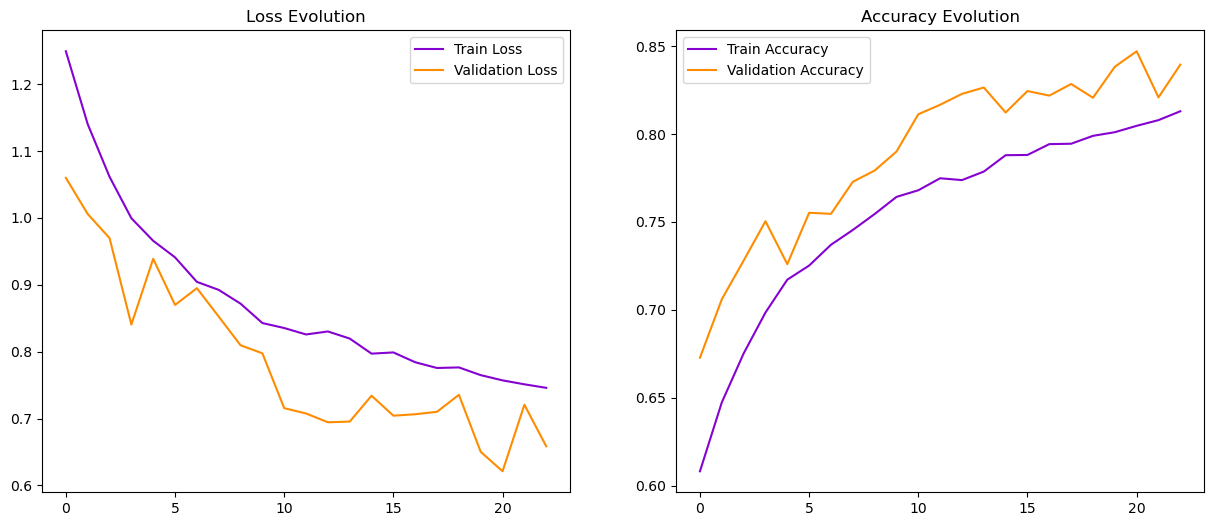

In [31]:
plt.figure(figsize=(15,6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(model.history.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model.history.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">

Based on the visualizations above, it's evident that the model is performing well without signs of overfitting. This conclusion is supported by the close alignment of training and validation accuracy and loss values throughout the training process. The gap between training and validation accuracy remains minimal, indicating that the model generalizes well to unseen data. Similarly, the model's loss on validation data closely follows the training loss, reinforcing the assertion of good generalization. Therefore, the model appears to be well regularized and not overfitting to the training data.

<a id="evaluation"></a>
# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 | Evaluating the Optimal Model on Test Data</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">

As we have set `restore_best_weights=True` in EarlyStopping, after training, the model itself will have the best weights Following this, I will use this model to evaluate its performance on the test data, calculating the test accuracy and loss:

In [33]:
# Use the model to make predictions, evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.8278 - loss: 0.7310

Test Accuracy: 0.828000009059906
Test Loss:     0.7249388694763184


<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">

<h3 align="left"><font color=#8502d1>🎯 Inference:</font></h3>

With a test accuracy of __more than 90%__, our model demonstrates exceptional performance on unseen data. This high accuracy, achieved using __a relatively compact model of just about 1.2 million parameters__, is noteworthy. Many advanced architectures employ tens or even hundreds of millions of parameters to achieve similar or only slightly better results. The proximity of the test loss and accuracy to their respective training counterparts signifies that our model is not merely memorizing the training data but is genuinely understanding patterns and effectively generalizing from the training data to unseen data. Thus, it can be inferred that our model not only delivers reliable predictions but also strikes a balance between efficiency and performance.

<a id="image"></a>
# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8 | Performance on an Out-of-Dataset Image</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">

To further explore the generalization capability of our trained CIFAR-10 classification model, I'll assess its performance using an external truck image. This image, which isn't part of the CIFAR-10 dataset, has been sourced from my [GitHub repository](https://github.com/FarzadNekouee/Keras-CIFAR10-CNN-Model/blob/master/truck_sample.png). It provides an opportunity to see how our model behaves with real-world, out-of-dataset samples:

In [103]:
import urllib.request
import numpy as np
import cv2
import os
from urllib.request import pathname2url # Helper for converting local paths to URL format

# --- Corrected for downloaded .png files ---
# Set the URL to your local downloaded .png file
# IMPORTANT: Make sure this file exists at this exact path on your system.
# Use a raw string (r"...") or double backslashes (\\) to define the path correctly.
url_local_file = r"C:\Users\Abdur Rafay Waqar\Downloads\truck1.png"

# Convert the local file path to a 'file://' URL that urllib.request.urlopen() can handle
# pathname2url handles converting backslashes and URL-encoding characters like spaces
url = 'file:///' + pathname2url(url_local_file)

print(f"Attempting to open local file as URL: {url}")

# --- Rest of your code (remains exactly the same as per your instruction) ---
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print("Image loaded and processed successfully!")
print(f"Image shape: {image.shape}")

Attempting to open local file as URL: file://////C:/Users/Abdur%20Rafay%20Waqar/Downloads/truck1.png
Image loaded and processed successfully!
Image shape: (744, 920, 3)


<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">

Let's see our desired image:

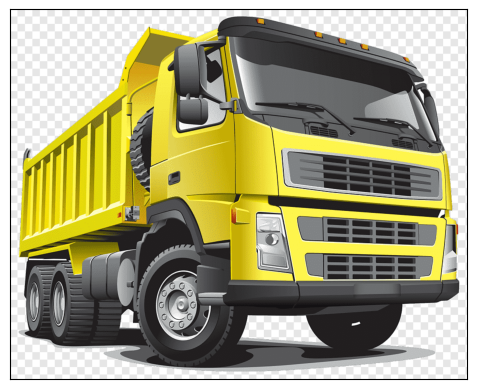

In [106]:
# Display the image
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">
    
We need to preprocess it in the same way as we did with the training and test data:

In [109]:
# Resize it to 32x32 pixels
image = cv2.resize(image, (32,32))

# Normalize the image
image = (image-mean)/(std+1e-7)

# Add an extra dimension because the model expects a batch of images
image = image.reshape((1, 32, 32, 3))

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">
    
Make the prediction:

In [112]:
prediction = model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">
    
The prediction will be a 10-element probability vector. To get the predicted class, we find the index with the maximum value:

In [115]:
predicted_class = prediction.argmax()

print('Predicted class: ', class_names[predicted_class])

Predicted class:  truck


<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:120%; text-align:left">
    
As seen, the model correctly predicted this single desired image.

<div style="display: flex; align-items: center; justify-content: center; border-radius: 10px; padding: 20px; background-color:  #e2c9ff; font-size: 120%; text-align: center;">

<strong>🎯 If you need more information or want to explore the code, feel free to visit the project repository on <a href="https://github.com/FarzadNekouee/Keras-CIFAR10-CNN-Model">GitHub</a> 🎯</strong>
</div>


<h2 align="left"><font color='#8502d1'>Best Regards!</font></h2>